# Project 2 - DecisionTree Classification/Regression
### By: Katherine Ochoa and Lulua Shahmalak

--------------------
**Introduction:** 
We accessed our dataset, exams.csv from the kaggle website. The data was collected from three high schools in the U.S. and it contains information on the performance of high school students in mathematics, including their grades and demographic information. The purpose of this dataset is to understand the relationship between students' performance and their demographics.

We are interested to understand the relationship between a student's gender and their exam scores (reading, writing and math). We will use decision tree classification/regression to learns the underlying relationship between gender and exam scores in the form of a model.


Reference: https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics

The dataset is a csv containing 1000 rows and 8 columns:

• Gender: The gender of the student (male/female)

• Race/ethnicity: The student's racial or ethnic background (Asian, African-American, Hispanic, etc.)

• Parental level of education: The highest level of education attained by the student's parent(s) or guardian(s)

• Lunch: Whether the student receives free or reduced-price lunch (yes/no)

• Test preparation course: Whether the student completed a test preparation course (yes/no)

• Math score: The student's score on a standardized mathematics test

• Reading score: The student's score on a standardized reading test

• Writing score: The student's score on a standardized writing test


### **Prepare and wrangle data**

In [ ]:
# Import packages
import pandas as pd # For handling data frames 
import numpy as np # For array calculations

In [ ]:
# Read the CSV file into a data frame variable
from google.colab import drive
drive.mount('/content/drive')
exams = pd.read_csv('/content/drive/MyDrive/exams.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [ ]:
exams.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
exams.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [ ]:
byRace = exams.groupby("race/ethnicity")
byRace.describe()

math score                                                 \
                    count       mean        std   min    25%   50%   75%   
race/ethnicity                                                             
group A              79.0  65.696203  12.480091  34.0  57.00  65.0  74.5   
group B             198.0  64.070707  14.602866  27.0  54.25  64.0  75.0   
group C             323.0  65.510836  14.585442  20.0  57.00  66.0  76.0   
group D             257.0  68.879377  15.792510  15.0  59.00  69.0  81.0   
group E             143.0  77.426573  13.911941  41.0  67.50  80.0  88.0   

                      reading score             ...               \
                  max         count       mean  ...   75%    max   
race/ethnicity                                  ...                
group A          96.0          79.0  69.202532  ...  77.0   97.0   
group B         100.0         198.0  68.530303  ...  79.0  100.0   
group C          95.0         323.0  68.609907  ...  78.0   98.0   
group D         100.0         257.0  70.929961  ...  79.0  100.0   
group E         100.0         143.0  76.615385  ...  87.0  100.0   

               writing score                                                \
                       count       mean        std   min   25%   50%   75%   
race/ethnicity                                                               
group A                 79.0  67.848101  13.383005  36.0  58.5  69.0  76.5   
group B                198.0  66.717172  15.700910  30.0  55.0  67.0  77.0   
group C                323.0  66.804954  14.378935  15.0  58.0  68.0  76.0   
group D                257.0  71.058366  14.948887  32.0  60.0  72.0  81.0   
group E                143.0  75.034965  14.599061  38.0  63.5  77.0  86.0   

                       
                  max  
race/ethnicity         
group A          93.0  
group B         100.0  
group C          99.0  
group D         100.0  
group E         100.0  

[5 rows x 24 columns]

### **EDA principles and the Matplotlib / Seaborn**

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

<ipython-input-11-5ac688196b27>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


**Plot - Math Scores based on ethnicity**

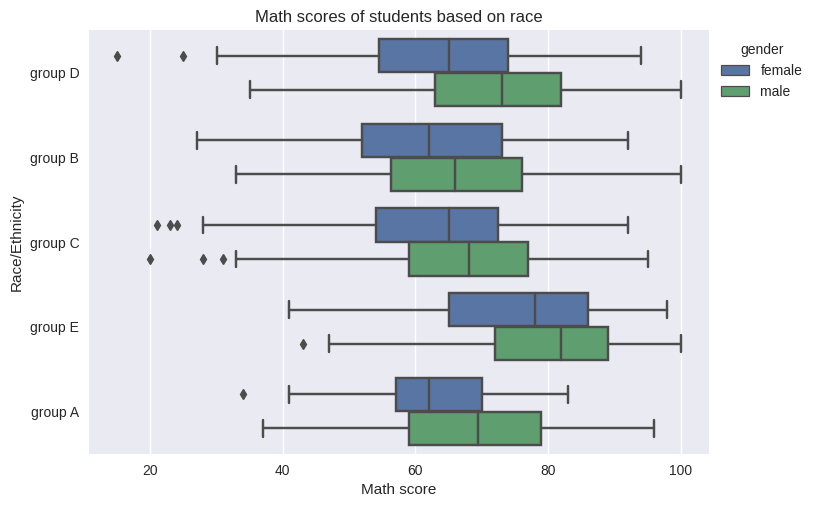

In [ ]:
ax = sns.boxplot(data=exams, x= 'math score', y='race/ethnicity', hue='gender')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Math score")
plt.ylabel("Race/Ethnicity")
plt.title("Math scores of students based on race");

Most outliers seem to be in group C, otherwise the race/ gender distribution seems to be quite normal. Something to notice is that in every etnic group there are more males than females with higher scores; some even reaching up to 100.

**Plot - interactive scatter plot of math and reading scores compared to Gender**

In [ ]:
import plotly.express as px

fig = px.scatter(exams, x='math score', y='reading score', 
                 color='parental level of education',title='Maths Scores vs Reading Scores')
fig.show()

There seems to be no visible correalation between parental education status and student exam scores.

**Plot - All scores according to gender of students**

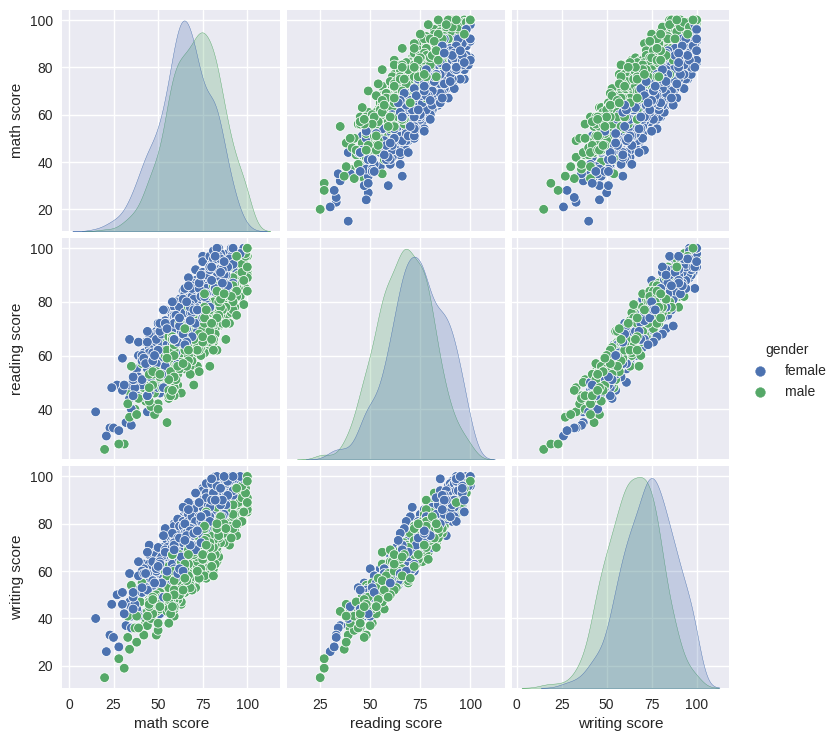

In [ ]:
sns.pairplot(exams,hue='gender')

### **Scikit-learn DecisionTree Classification**

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score

In [ ]:
X = exams.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'], axis=1)
y = exams['gender']
X.head()

,math score,reading score,writing score
0,59,70,78
1,96,93,87
2,57,76,77
3,70,70,63
4,83,85,86


In [ ]:
y.head()

0    female
1      male
2    female
3      male
4    female
Name: gender, dtype: object

Encoding the categorical target variable: Male as 1 and Female as 0

In [ ]:
y = exams['gender'].map({'male':1, 'female':0})
y[0:10]

0    0
1    1
2    0
3    1
4    0
5    1
6    0
7    0
8    1
9    0
Name: gender, dtype: int64

### Classification-tree

Predict whether a student is male or female based on test scores

In [ ]:
# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=1)

#Instantiate clf
clf = DecisionTreeClassifier(max_depth=8,criterion='entropy', random_state=1)

In [ ]:
# Fit clf to the training set
clf.fit(X_train,y_train)
# Predict the test set labels
y_pred= clf.predict(X_test)
print(y_pred[0:5])

# Evaluate the test-set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

[1 1 0 0 0]
Test set accuracy: 0.84


### Plot the Decision tree with tree.plot_tree

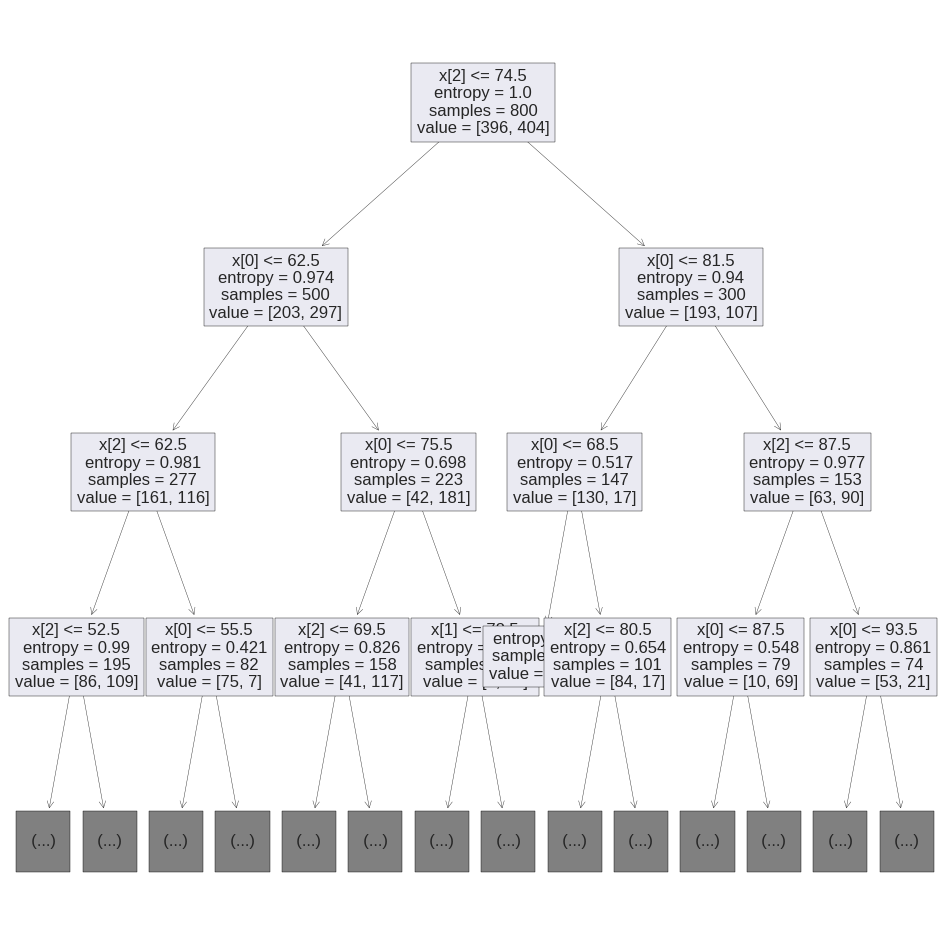

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=clf, max_depth= 3,fontsize=12);

### **Scikit-learn DecisionTree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
# Instantiate a DecisionTreeRegressor 'dt'
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2,random_state=3)
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=3)

In [ ]:
# Fit 'dt' to the training-set
dt.fit(X_train1, y_train1)
# Predict test-set levels
y_pred1 = dt.predict(X_test1)

In [ ]:
mse_dt = MSE(y_test1, y_pred1)
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.42


As our RMSE score is 0.42, we can conclude that our regression model is a good predictor of gender vs exam score results